# Project Five
# Game of Thrones - TSNE

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
import spacy
from nltk import Tree
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph
from nltk.parse import ProjectiveDependencyParser
from nltk.parse import NonprojectiveDependencyParser
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
from nltk.tag import pos_tag
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Using Theano backend.


In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [3]:
import pickle

with open('/Users/zoemarkovits/Metis/project_five_got/total_corpus_texts2.pkl', 'rb') as f:
    total_corpus_texts = pickle.load(f)

In [4]:
total_corpus_texts

[['well', 'struck'],
 ['well', 'struck', 'dog'],
 ['like'],
 ['well', 'struck', 'grace'],
 ['already', 'said', 'well', 'struck'],
 ['yes', 'grace'],
 ['ser', 'dontos', 'red', 'house', 'hollard'],
 ['ser', 'dontos', 'red', 'house', 'hollard'],
 [],
 ['sorry', 'grace'],
 ['deepest', u'apology'],
 ['drunk'],
 [],
 ['uh'],
 ['grace'],
 ['two', u'cup', 'wine'],
 ['two', u'cup'],
 ['thats', 'much'],
 ['please', 'another', 'cup'],
 ['sure', 'grace'],
 ['two'],
 ['much', 'like'],
 ['would', 'honored', 'grace'],
 ['ser', 'meryn', 'help', 'ser', 'dontos', 'celebrate', 'name', 'day'],
 ['see', u'drink', 'fill'],
 ['cant'],
 ['say'],
 ['say', 'cant'],
 ['meant', 'would', 'bad', 'luck', 'kill', 'man', 'name', 'day'],
 ['kind', 'stupid', u'peasant', 'superstition', 'take', 'away'],
 ['ill', 'killed', 'tomorrow', 'fool'],
 [],
 ['fool', 'youre', 'clever', 'see'],
 ['hell', 'make', 'much', 'better', 'fool', 'knight'],
 ['doesnt', 'deserve', 'mercy', 'quick', 'death'],
 ['hear', 'lady', 'ser', 'dontos'

In [5]:
import gensim  
model = gensim.models.Word2Vec(total_corpus_texts, size=100, window=5, min_count=1, workers=2,sg=1)

In [6]:
model.wv.vocab.items()

[('foul', <gensim.models.keyedvectors.Vocab at 0x11880e0d0>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x1189b8e90>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x1189b8f90>),
 ('marching', <gensim.models.keyedvectors.Vocab at 0x119f2d0d0>),
 (u'increase', <gensim.models.keyedvectors.Vocab at 0x11a11de10>),
 ('midafternoon', <gensim.models.keyedvectors.Vocab at 0x119f2d150>),
 ('mutinied', <gensim.models.keyedvectors.Vocab at 0x119f2d190>),
 ('lord', <gensim.models.keyedvectors.Vocab at 0x119f2d1d0>),
 (u'sinking', <gensim.models.keyedvectors.Vocab at 0x119f2d210>),
 ('leisurely', <gensim.models.keyedvectors.Vocab at 0x119f2d250>),
 (u'politician', <gensim.models.keyedvectors.Vocab at 0x119f2d290>),
 ('stabbed', <gensim.models.keyedvectors.Vocab at 0x119f2d2d0>),
 ('bringing', <gensim.models.keyedvectors.Vocab at 0x119f31ad0>),
 ('disturb', <gensim.models.keyedvectors.Vocab at 0x119f2d350>),
 ('prize', <gensim.models.keyedvectors.Vocab at 0x119f2d390>),
 ('wooden', <gensim

In [7]:
keys = model.wv.vocab.keys()

In [51]:
keys[:1000]

['foul',
 'four',
 'hanging',
 'marching',
 u'increase',
 'midafternoon',
 'mutinied',
 'lord',
 u'sinking',
 'leisurely',
 u'politician',
 'stabbed',
 'bringing',
 'disturb',
 'prize',
 'wooden',
 u'clientele',
 'succession',
 'straight',
 'tired',
 u'lefford',
 'bacon',
 'elegant',
 'second',
 'sailed',
 u'ruthless',
 'thunder',
 'cooking',
 'contributed',
 'resilient',
 'succumb',
 'hero',
 'interrupting',
 u'here',
 'substance',
 u'k',
 'climbed',
 'military',
 u'climber',
 'diplomat',
 'appropriately',
 'divide',
 'explained',
 'replace',
 'brought',
 'stern',
 'cheating',
 'spoke',
 u'cannibal',
 'occupying',
 'untie',
 'strike',
 'sideface',
 'holy',
 'relax',
 'successful',
 'brings',
 'hereby',
 'hurt',
 u'glass',
 u'hole',
 'hold',
 u'simper',
 u'benjens',
 'pursue',
 'zhoan',
 'blade',
 'plunged',
 'sweeter',
 'rework',
 'example',
 'triple',
 'organized',
 u'caution',
 'want',
 'counseling',
 'mymother',
 u'cocksucker',
 'absolute',
 'hog',
 'complaining',
 u'travel',
 'cop

In [8]:
len(keys)

6913

In [9]:
model_list = []

for i in model.wv.vocab.keys():
    model_list.append(model.wv[i])

In [10]:
model_list

[array([-0.22173199, -0.02847288, -0.02452429, -0.13510902, -0.11158416,
        -0.087762  , -0.11000211, -0.17835706, -0.01576813, -0.16966213,
         0.03163873, -0.10493077,  0.13369161, -0.11331347,  0.00163633,
         0.17660362,  0.08114357, -0.08294919, -0.1154362 , -0.01534267,
        -0.23864694, -0.16077624,  0.01272682,  0.18594919,  0.16519345,
        -0.13978699, -0.02255859, -0.09594911, -0.06877489, -0.09779025,
        -0.28197795,  0.02938614, -0.0043313 , -0.10322035,  0.04379585,
        -0.04568293, -0.18214998, -0.07137813,  0.07633194,  0.17292732,
        -0.12145662,  0.0084988 , -0.02782723, -0.13913113,  0.12319125,
        -0.22659838,  0.11521945, -0.00374883, -0.01387794,  0.16803446,
         0.21689034,  0.06952532, -0.13102049, -0.05136495, -0.12862815,
        -0.15080176,  0.00645683,  0.05343189, -0.17752032, -0.16563715,
         0.10181082, -0.07495803,  0.17649338, -0.14225975,  0.03660016,
        -0.11067854, -0.0348159 ,  0.0326215 ,  0.0

In [11]:
type(model_list)

list

In [12]:
model_vectors = pd.DataFrame(model_list)
model_vectors.shape

(6913, 100)

In [13]:
model_vectors = model_vectors.reset_index()

In [14]:
model_vectors['index'] = model.wv.vocab.keys()

In [15]:
model_vectors = model_vectors.set_index('index')

In [16]:
model_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,,,,,,,,,,,,,,,,,,,,,
foul,-0.221732,-0.028473,-0.024524,-0.135109,-0.111584,-0.087762,-0.110002,-0.178357,-0.015768,-0.169662,...,0.051969,0.017194,-0.183284,-0.140812,-0.060044,0.100257,-0.206033,0.003878,-0.148329,0.021519
four,-0.298033,-0.038513,-0.033008,-0.189796,-0.139719,-0.110801,-0.156445,-0.244832,-0.032850,-0.223314,...,0.069975,0.019145,-0.248157,-0.185083,-0.078413,0.137846,-0.283496,0.015169,-0.191391,0.023834
hanging,-0.147807,-0.024485,-0.017507,-0.091272,-0.067552,-0.059919,-0.079065,-0.118066,-0.016078,-0.104897,...,0.037994,0.012894,-0.125484,-0.089299,-0.047048,0.071187,-0.143523,0.004649,-0.092631,0.007815
marching,-0.279448,-0.028390,-0.030765,-0.170396,-0.135927,-0.107036,-0.147253,-0.241491,-0.034087,-0.209364,...,0.066652,0.024348,-0.229282,-0.180121,-0.084602,0.128916,-0.266743,0.005411,-0.182058,0.024377
increase,-0.052022,-0.001979,-0.009497,-0.033584,-0.024964,-0.019926,-0.029547,-0.050304,-0.007919,-0.041075,...,0.016606,0.000199,-0.040689,-0.037202,-0.019287,0.022014,-0.047902,0.005916,-0.039091,0.005461


In [17]:
model_vectors.index

Index([        u'foul',         u'four',      u'hanging',     u'marching',
           u'increase', u'midafternoon',     u'mutinied',         u'lord',
            u'sinking',    u'leisurely',
       ...
              u'lance',       u'risked',       u'squeak',       u'oberyn',
              u'cliff',    u'auxiliary',        u'wylla',    u'firestorm',
         u'baratheons',  u'furthermore'],
      dtype='object', name=u'index', length=6913)

In [18]:
pca20 = PCA(n_components=20)

pca_results20 = pca20.fit_transform(model_vectors)

In [19]:
pca_results_20 = pd.DataFrame(pca_results20)

In [20]:
pca_results_20 = pca_results_20.reset_index()

In [21]:
pca_results_20['index'] = model.wv.vocab.keys()

In [22]:
pca_results_20 = pca_results_20.set_index('index')

In [23]:
pca_results_20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
index,,,,,,,,,,,,,,,,,,,,
foul,0.469656,-0.012799,-0.026958,0.001592,0.007738,-0.008065,0.003915,0.002914,0.000514,-0.002240,-0.001607,-0.004916,-0.005283,0.005934,-0.001418,-0.001404,-0.002019,-0.001543,0.002111,-0.001578
four,0.856590,-0.019361,-0.015271,0.027214,0.006743,-0.000759,-0.000088,0.013443,-0.003089,0.008460,-0.008425,-0.002622,-0.001128,0.001810,0.002581,0.002980,0.001105,0.004247,-0.002835,0.006753
hanging,0.073811,-0.007017,-0.010424,0.009134,0.000096,0.000994,0.006259,-0.003269,-0.005364,-0.002684,-0.006704,0.000521,-0.005088,0.001309,-0.002004,-0.003452,0.004658,0.000276,-0.003187,-0.005771
marching,0.780720,-0.002049,-0.003507,0.028625,-0.007764,-0.008405,-0.013659,-0.005107,-0.007676,-0.003663,0.000923,0.000639,-0.001584,-0.008363,0.003551,0.001304,-0.001764,-0.001914,0.002178,0.005376
increase,-0.418266,0.002751,0.001897,-0.001349,-0.001142,0.007446,0.000598,0.001525,-0.003905,-0.000775,-0.000281,0.002519,0.004754,0.000086,-0.002867,0.001560,-0.007001,0.003299,0.000483,0.002066


In [24]:
tsne = TSNE(n_components=2)

tsne_pca_results20 = tsne.fit_transform(pca_results20)

In [25]:
tsne_pca_results_20 = pd.DataFrame(tsne_pca_results20)

In [26]:
tsne_pca_results_20.head()

,0,1
0,6.732811e+16,6.394760e+16
1,-7.934499e+16,-8.529008e+16
2,3.259092e+17,5.809510e+17
3,5.763907e+14,-3.628699e+16
4,6.216559e+16,4.926055e+16


In [27]:
tsne_pca_results_20 = tsne_pca_results_20.reset_index()

In [28]:
tsne_pca_results_20['index'] = model.wv.vocab.keys()

In [29]:
tsne_pca_results_20 = tsne_pca_results_20.set_index('index')

In [30]:
tsne_pca_results_20.shape

(6913, 2)

In [31]:
tsne_pca_results_20.head(10)

,0,1
index,,
foul,6.732811e+16,6.394760e+16
four,-7.934499e+16,-8.529008e+16
hanging,3.259092e+17,5.809510e+17
marching,5.763907e+14,-3.628699e+16
increase,6.216559e+16,4.926055e+16
midafternoon,4.589311e+16,-1.486309e+17
mutinied,6.637987e+15,-4.306517e+16
lord,3.533712e+16,1.608708e+16
sinking,4.752425e+16,3.354482e+16


In [34]:
topwords_index = tsne_pca_results_20.loc[:'plotting']
topwords_index

,0,1
index,,
foul,6.732811e+16,6.394760e+16
four,-7.934499e+16,-8.529008e+16
hanging,3.259092e+17,5.809510e+17
marching,5.763907e+14,-3.628699e+16
increase,6.216559e+16,4.926055e+16
midafternoon,4.589311e+16,-1.486309e+17
mutinied,6.637987e+15,-4.306517e+16
lord,3.533712e+16,1.608708e+16
sinking,4.752425e+16,3.354482e+16


In [35]:
topwords_index.to_csv('tsne2.csv', index=False)

In [36]:
tsne_pca_results_20 = tsne_pca_results_20.reset_index()

In [37]:
tsne_pca_results_20.head()

,index,0,1
0,foul,6.732811e+16,6.394760e+16
1,four,-7.934499e+16,-8.529008e+16
2,hanging,3.259092e+17,5.809510e+17
3,marching,5.763907e+14,-3.628699e+16
4,increase,6.216559e+16,4.926055e+16


In [38]:
topwords = tsne_pca_results_20.loc[:1000]
topwords

,index,0,1
0,foul,6.732811e+16,6.394760e+16
1,four,-7.934499e+16,-8.529008e+16
2,hanging,3.259092e+17,5.809510e+17
3,marching,5.763907e+14,-3.628699e+16
4,increase,6.216559e+16,4.926055e+16
5,midafternoon,4.589311e+16,-1.486309e+17
6,mutinied,6.637987e+15,-4.306517e+16
7,lord,3.533712e+16,1.608708e+16
8,sinking,4.752425e+16,3.354482e+16
9,leisurely,-9.833665e+16,-6.927312e+16


In [39]:
topwords.to_csv('tsne.csv', index=False)

In [40]:
tsne_pca_results_20.shape

(6913, 3)

In [44]:
tsne_pca_results_20 = tsne_pca_results_20.set_index('index')

In [45]:
tsne_pca_results20

array([[  6.73281102e+16,   6.39476020e+16],
       [ -7.93449852e+16,  -8.52900764e+16],
       [  3.25909222e+17,   5.80950952e+17],
       ..., 
       [ -1.79615751e+17,   2.00366773e+16],
       [ -5.41661674e+16,  -1.21679073e+16],
       [  1.32634187e+17,   1.68130019e+17]])

In [46]:
tsne_pca_results_20.index

Index([        u'foul',         u'four',      u'hanging',     u'marching',
           u'increase', u'midafternoon',     u'mutinied',         u'lord',
            u'sinking',    u'leisurely',
       ...
              u'lance',       u'risked',       u'squeak',       u'oberyn',
              u'cliff',    u'auxiliary',        u'wylla',    u'firestorm',
         u'baratheons',  u'furthermore'],
      dtype='object', name=u'index', length=6913)

In [47]:
tsne_pca_results_20.head()

,0,1
index,,
foul,6.732811e+16,6.394760e+16
four,-7.934499e+16,-8.529008e+16
hanging,3.259092e+17,5.809510e+17
marching,5.763907e+14,-3.628699e+16
increase,6.216559e+16,4.926055e+16


<IPython.core.display.Javascript object>


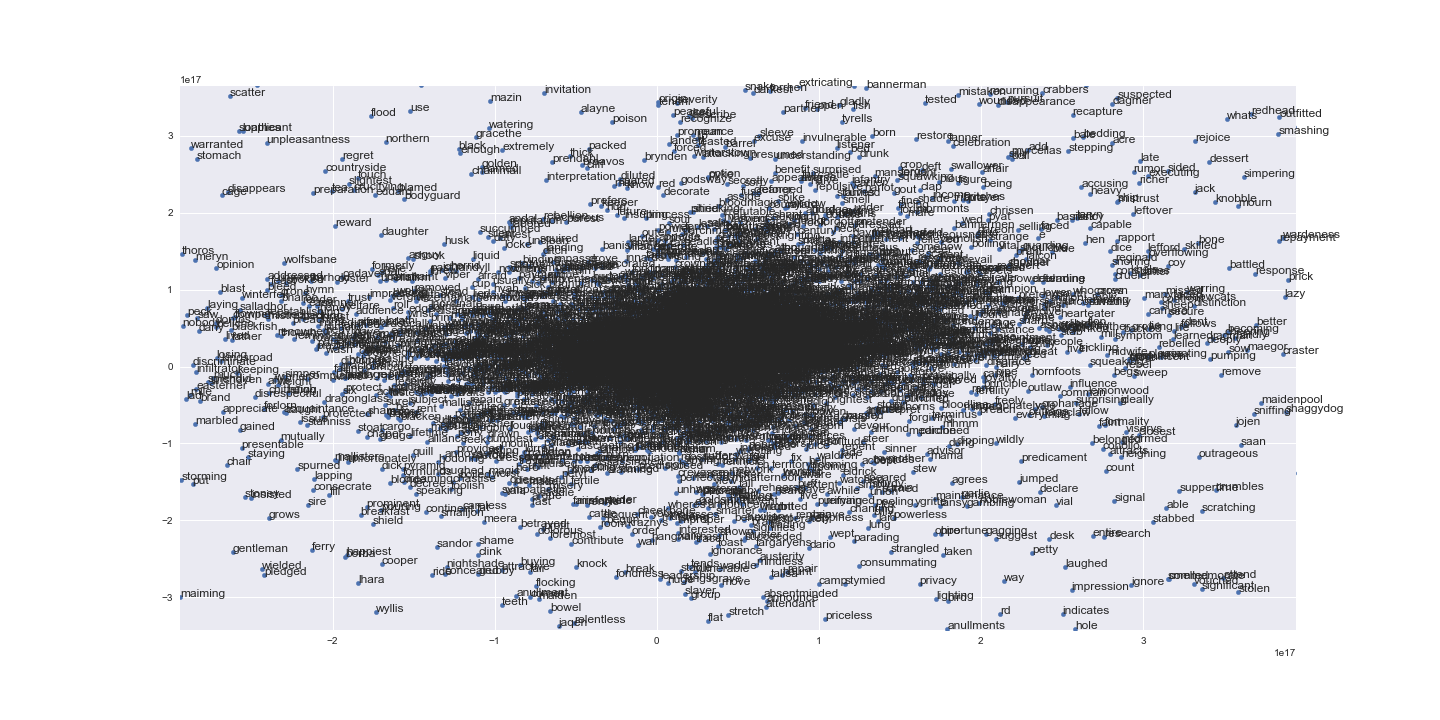

In [48]:
import numpy as Math
import pylab as Plot
import matplotlib.pyplot as plt

rows = tsne_pca_results_20.index
%matplotlib notebook
plt.ion()

Plot.figure(figsize=(20, 10))
max_x = Math.amax(tsne_pca_results20, axis=0)[0]
max_y = Math.amax(tsne_pca_results20, axis=0)[1]
#Plot.xlim((-.125e+20,.25e+20))
#Plot.ylim((-.125+e20,.1e20))

Plot.scatter(tsne_pca_results20[:, 0], tsne_pca_results20[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = tsne_pca_results20[row_id, 0]
    y = tsne_pca_results20[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_200.png");